# Machine Learning 25: K-Nearest Neighbors (KNN) Classification

### 1.What Is KNN Classification?

K-Nearest Neighbors (KNN) is a **non-parametric**, **instance-based** learning algorithm used for **classification and regression**. In classification, it predicts the class of a data point based on the classes of its **K nearest neighbors** in the feature space.

### 2.Core Concepts

- **Feature Space**: Each data point is represented as a vector in an n-dimensional space.
- **Distance Metric**: Typically Euclidean distance is used to measure how close two points are.
- **K Value**: The number of neighbors to consider. Choosing K is crucial—too small can lead to noise sensitivity, too large can dilute the decision.

### 3.How It Works (Step-by-Step)

1. **Training Phase**:  
   - No actual training! KNN simply stores the training data.

2. **Prediction Phase**:  
   - Given a new data point:
     - Calculate the distance between this point and all points in the training set.
     - Identify the K closest points.
     - Perform a **majority vote** among these neighbors.
     - Assign the most common class label to the new point.

### 4.Pros and Cons

**Advantages:**
- Simple and intuitive
- No training time
- Works well with small datasets

**Disadvantages:**
- Computationally expensive for large datasets
- Sensitive to irrelevant features and feature scaling
- Struggles with high-dimensional data (curse of dimensionality)

### 5. Example
Imagine you're trying to classify a fruit based on weight and color. You input a new fruit with certain features, and KNN looks at the K most similar fruits in the dataset. If most of them are apples, it classifies your fruit as an apple.


In [1]:
# Step 1: Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Step 4: Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [5]:
# Step 5: Make predictions
y_pred = knn.predict(X_test)

In [6]:
# Step 6: Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



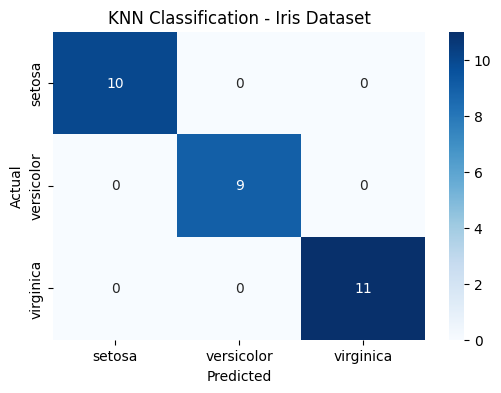

In [7]:
# Step 7: Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Classification - Iris Dataset')
plt.show()
